<a href="https://colab.research.google.com/github/Om629/data_science_project-bankrupcy-/blob/main/bankrupcy(arati).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
DS = pd.read_csv('/content/drive/MyDrive/data/bankruptcy.csv')

FileNotFoundError: ignored

In [ ]:
DS.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,1.17,0.40
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,1.73,0.60
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,1.36,0.41
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,1.13,0.44
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,1.88,0.42


In [ ]:
# import all necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
DS = DS.dropna()

In [ ]:
dataset.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,1.17,0.40
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,1.73,0.60
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,1.36,0.41
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,1.13,0.44
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,1.88,0.42


In [ ]:
data = DS [["D","YR","R1","R2","R3","R4","R5","R6","R7","R8","R9","R10"]]

In [ ]:
data.head()

,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10
0,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,1.17,0.40
1,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,1.73,0.60
2,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,1.36,0.41
3,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,1.13,0.44
4,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,1.88,0.42


In [ ]:
data.dtypes

D        int64
YR       int64
R1     float64
R2     float64
R3     float64
R4     float64
R5     float64
R6     float64
R7     float64
R8     float64
R9     float64
R10    float64
dtype: object

In [ ]:
data.nunique()

D        2
YR      12
R1      51
R2      20
R3      26
R4      43
R5      39
R6      39
R7      56
R8     121
R9      96
R10     59
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4879f87d0>,
      dtype=object)

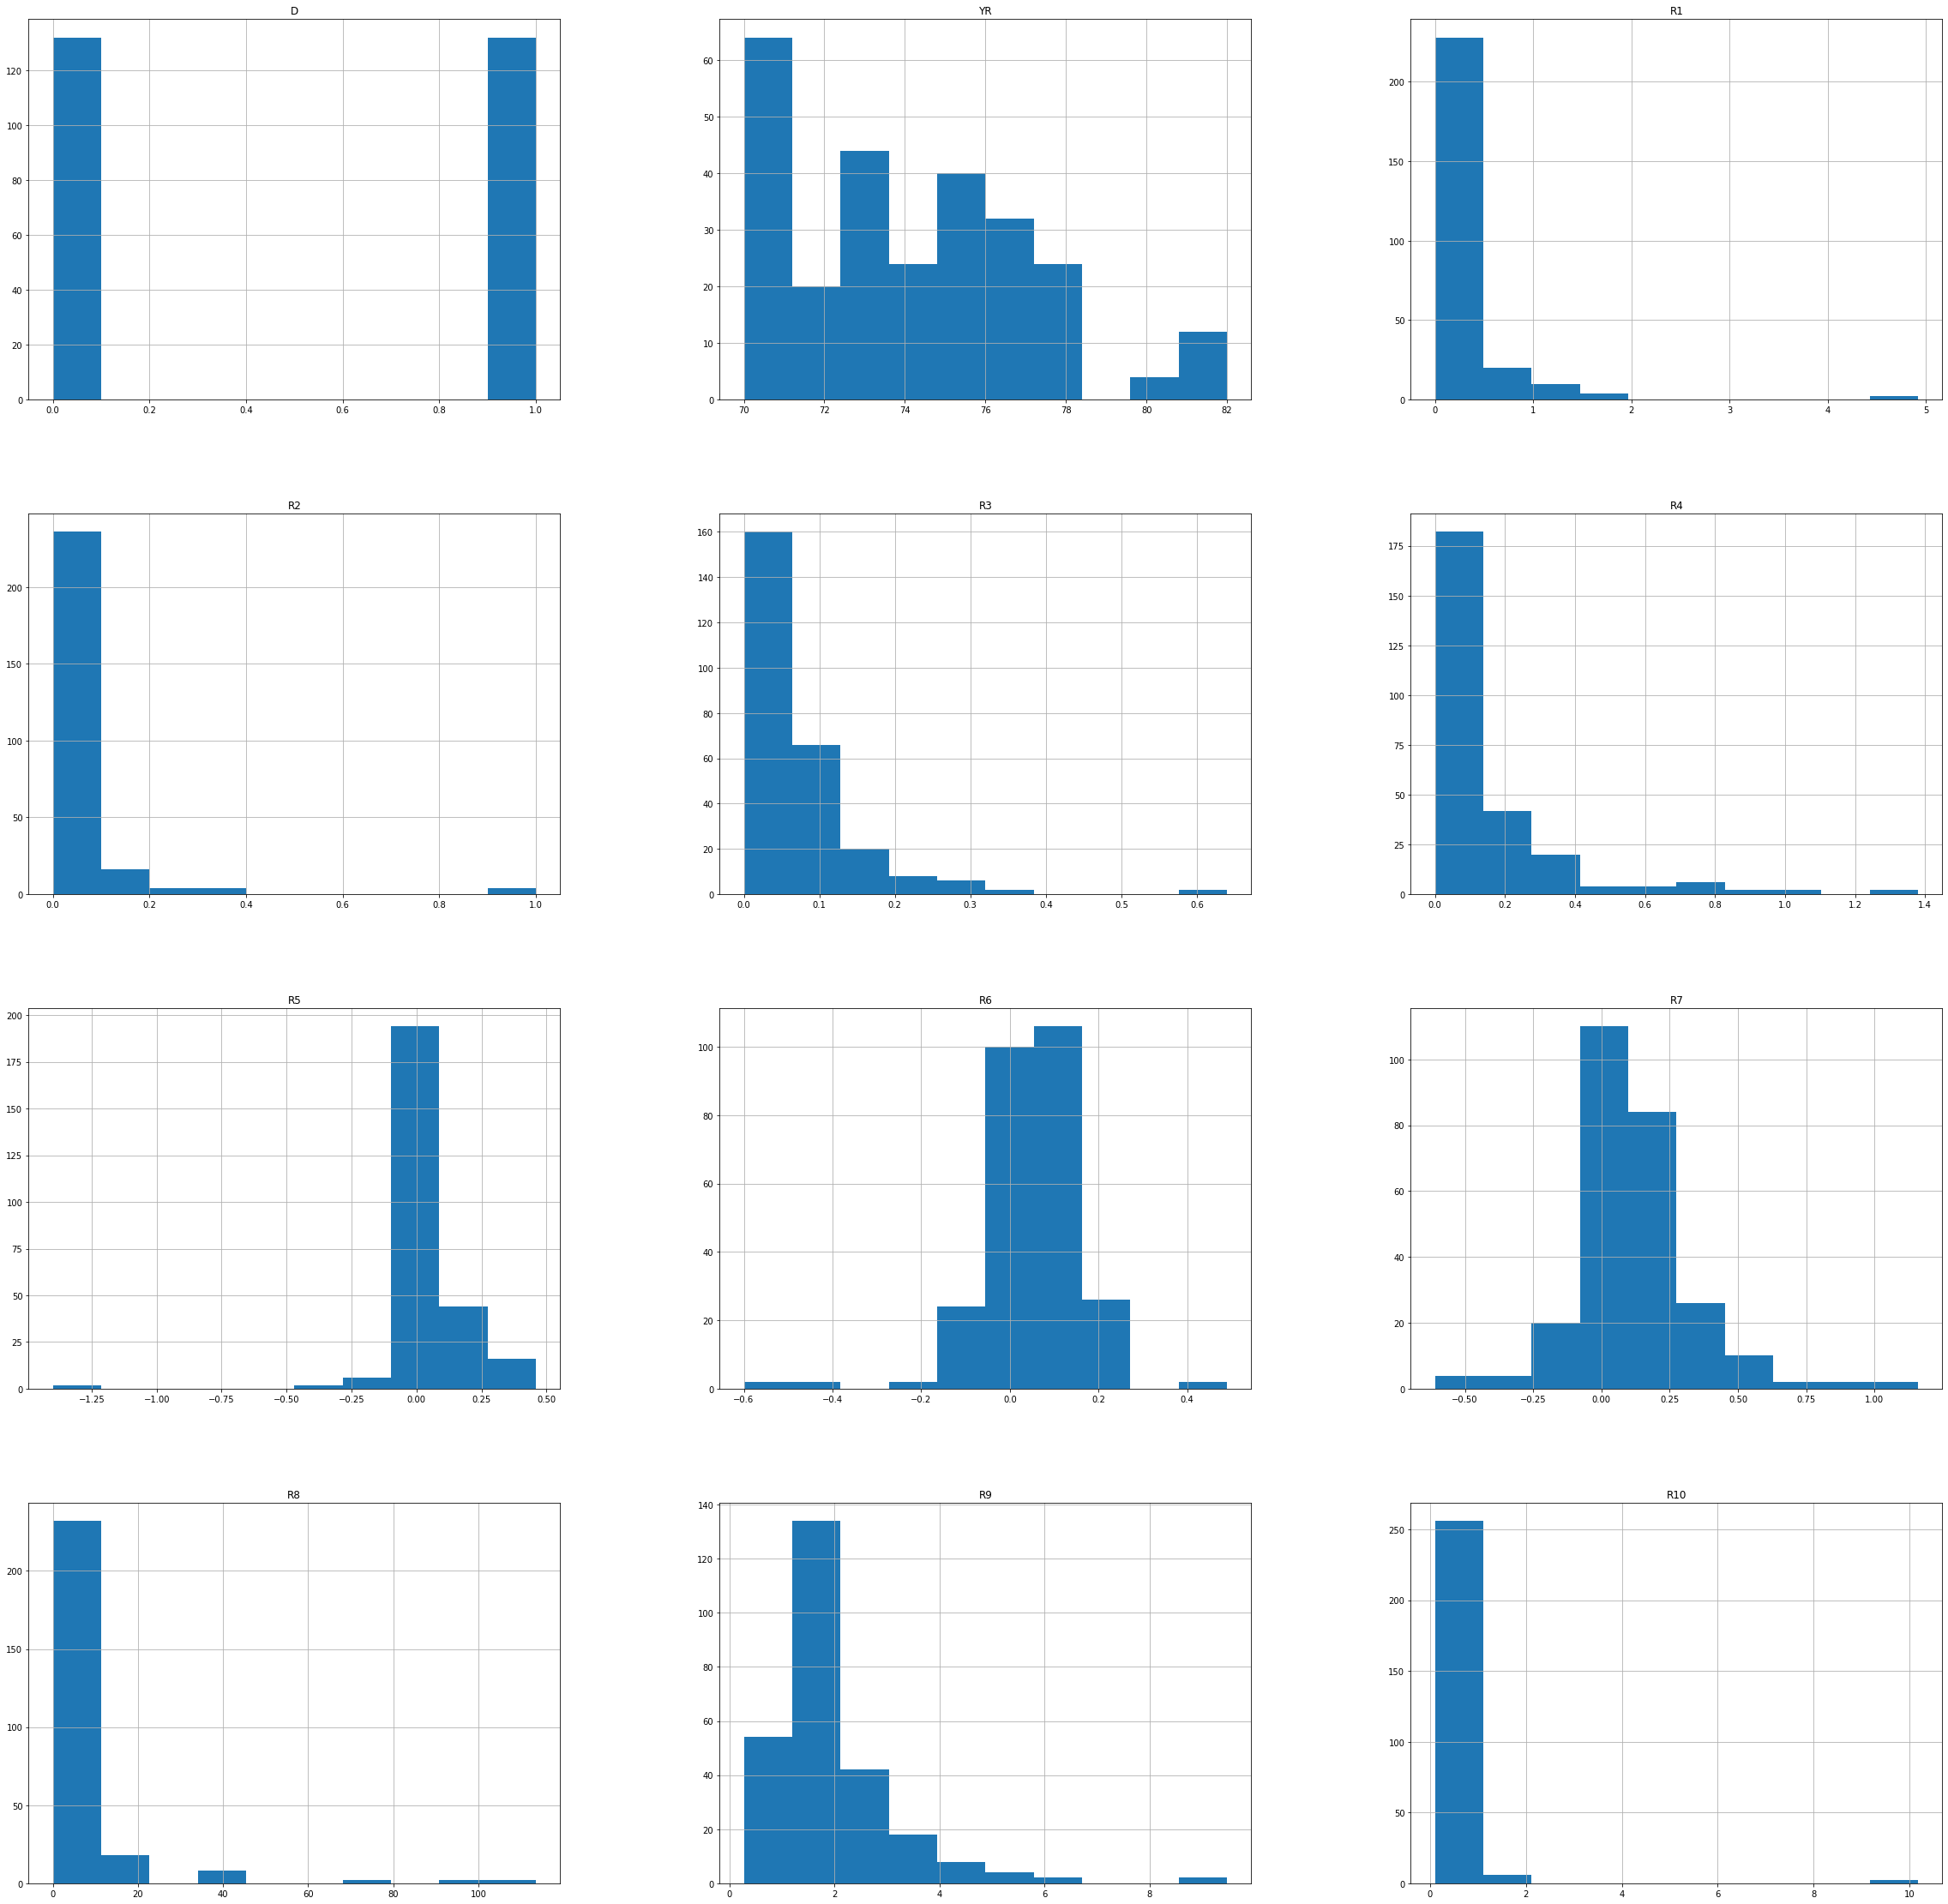

In [ ]:
data.hist(figsize= (40,40))

In [ ]:
for name in data:
  print(name)

D
YR
R1
R2
R3
R4
R5
R6
R7
R8
R9
R10


In [ ]:
# correlation matrix for observing  the strengh of relation of each variable with bankrupcy 

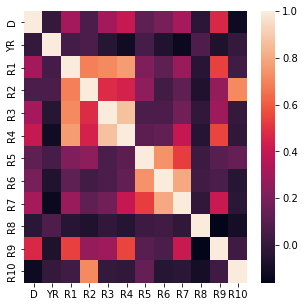

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())

In [ ]:
# density plot to observe relationship of intersted variable with bankruptcy

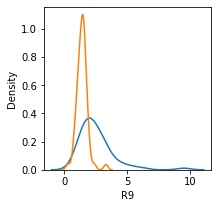

In [ ]:
fig = plt .figure(figsize=(3,3))
sns.kdeplot(data[data['D']==1]['R9'])
sns.kdeplot(data[data['D']==0]['R9'])

In [ ]:
# X and Y variable

In [ ]:
X= data.drop(columns="D")
Y=data["D"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [ ]:
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [ ]:
X_train= stats.zscore(X_train)
X_test=stats.zscore(X_test)

In [ ]:
# Decision tree

In [ ]:
from sklearn import metrics
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("train set accuracy", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("test set accuracy", metrics.accuracy_score(Y_test,pred))

train set accuracy 1.0
test set accuracy 0.6515151515151515


In [ ]:
# important variables 

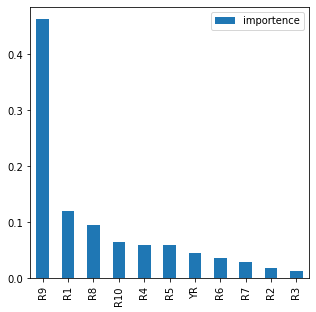

In [ ]:
feat_importance =pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["importence"])
feat_importance.sort_values(by="importence",ascending=False, inplace=True)
feat_importance.plot(kind='bar', figsize=(5,5))

In [ ]:
#confusion matrix = decision tree 

In [ ]:
confusion_matrix(Y_test, pred)

array([[15, 18],
       [ 5, 28]])

In [ ]:
# randam forest 

In [ ]:
from pandas.io.formats.printing import PrettyDict
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("train set accuracy", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("test set accuracy", metrics.accuracy_score(Y_test,pred))

train set accuracy 1.0
test set accuracy 0.8636363636363636


In [ ]:
# important variable

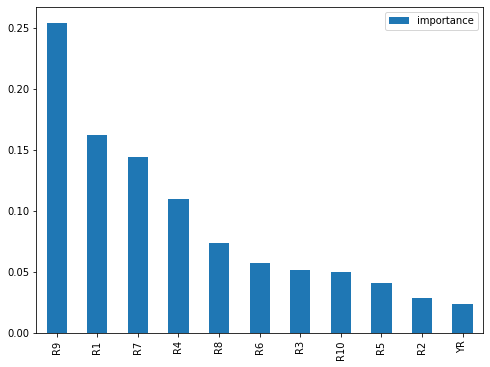

In [ ]:
feat_importance = pd.DataFrame(model.feature_importances_, index= X_train.columns, columns=["importance"])
feat_importance.sort_values(by='importance', ascending=False, inplace=True)
feat_importance.plot(kind= 'bar', figsize=(8,6))

In [ ]:
# confusion matrix = random forest

In [ ]:
confusion_matrix(Y_test,pred)

array([[29,  4],
       [ 5, 28]])

In [ ]:
# KNN 

In [ ]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm =confusion_matrix(Y_test, pred)
print("trsin set accuracy", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("test set accuracy", metrics.accuracy_score(Y_test,pred))

trsin set accuracy 0.9797979797979798
test set accuracy 0.7575757575757576


In [ ]:
# confuson matrix = KNN

In [ ]:
confusion_matrix(Y_test,pred)

array([[29,  4],
       [12, 21]])

In [ ]:
# best model for this data is randamforest because test accuracy is high 